# Before we go for M-4 labs
- from "모두의 딥러닝"

## 12. multinomial classification
- iris data
- one-hot encoding
- softmax
- F-fold cross validation

In [ ]:
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
np.random.seed(17)
iris_data = sns.load_dataset("iris")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
dataset = iris_data.values
X = dataset[:,0:4].astype('float')
Y_obj = dataset[:,4]

Y = LabelEncoder().fit_transform(Y_obj)
Y_encoded = np_utils.to_categorical(Y)   #  one-hot encoding

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2)

In [ ]:
# model and compile & train & predict(evaluate)
model = Sequential()
# model.add(Dense(16,  input_dim=4, activation='relu'))
model.add(Dense(16,  input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train.shape, Y_train.shape

((120, 4), (120, 3))

In [ ]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=5)
model.save('iris_model.h5')

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 1.3312 - accuracy: 0.3333
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 1.0453 - accuracy: 0.5667
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.8886 - accuracy: 0.7083
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.7709 - accuracy: 0.7000
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.6833
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6500
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5925 - accuracy: 0.6750
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7000
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.6917
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.6917
Epoch 11/50
24/24 [

In [ ]:
from keras.models import load_model
del model   # delete existing models in memory
model = load_model('iris_model.h5')  # newly call the model
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

1/1 [==============================] - 0s 4ms/step - loss: 0.1991 - accuracy: 1.0000

 Accuracy: 1.0000


In [ ]:
X.shape, Y.shape

((150, 4), (150,))

## for K-fold validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

n_fold = 5
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=17)

cvscores = []
for train_index, test_index in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(16,  input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    y_train_en = np_utils.to_categorical(y_train)
    y_test_enc = np_utils.to_categorical(y_test)
    
    model.fit(X_train, y_train_en, epochs=50, batch_size=5, verbose=0)
    score = model.evaluate(X_test, y_test_enc, verbose=0)
    cvscores.append(score)

In [ ]:
model.metrics_names, cvscores

(['loss', 'accuracy'],
 [[0.20477159321308136, 0.9666666388511658],
  [0.3510998785495758, 0.8999999761581421],
  [0.26057079434394836, 0.9666666388511658],
  [0.2964290380477905, 0.9666666388511658],
  [0.2828664481639862, 0.9666666388511658]])

## 14. Callback - check point and early stopping

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import tensorflow as tf

In [ ]:
df_all = pd.read_csv('wine.csv', header=None)
df = df_all.sample(frac=0.2)  # get only 20% of dataset
df.shape

(1299, 13)

In [ ]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
5510,7.2,0.23,0.82,1.3,0.149,70.0,109.0,0.99304,2.93,0.42,9.2,6,0


In [ ]:
df[12].value_counts()

0    980
1    319
Name: 12, dtype: int64

In [ ]:
dataset = df.values
X, y = dataset[:,0:12], dataset[:,12]

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장 (epoch 마다)
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', 
                               verbose=1, 
                               save_best_only=True)  # record only when imrpoved

# 테스트 오차가 줄지 않으면 학습 자동 중단 설정 (모니터할 값 저장)
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=100) # 좋아지지 않아도 몇 번까지 기다릴것인지


Epoch 00001: val_loss improved from inf to 1.79359, saving model to ./model/01-1.7936.hdf5

Epoch 00002: val_loss improved from 1.79359 to 0.49681, saving model to ./model/02-0.4968.hdf5

Epoch 00003: val_loss improved from 0.49681 to 0.30308, saving model to ./model/03-0.3031.hdf5

Epoch 00004: val_loss did not improve from 0.30308

Epoch 00005: val_loss improved from 0.30308 to 0.27554, saving model to ./model/05-0.2755.hdf5

Epoch 00006: val_loss did not improve from 0.27554

Epoch 00007: val_loss improved from 0.27554 to 0.26100, saving model to ./model/07-0.2610.hdf5

Epoch 00008: val_loss improved from 0.26100 to 0.25449, saving model to ./model/08-0.2545.hdf5

Epoch 00009: val_loss did not improve from 0.25449

Epoch 00010: val_loss improved from 0.25449 to 0.23732, saving model to ./model/10-0.2373.hdf5

Epoch 00011: val_loss did not improve from 0.23732

Epoch 00012: val_loss improved from 0.23732 to 0.22651, saving model to ./model/12-0.2265.hdf5

Epoch 00013: val_loss impro

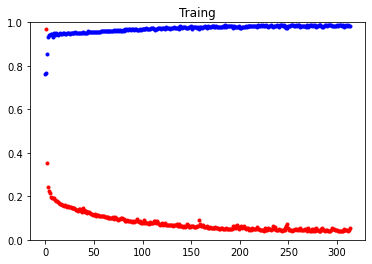

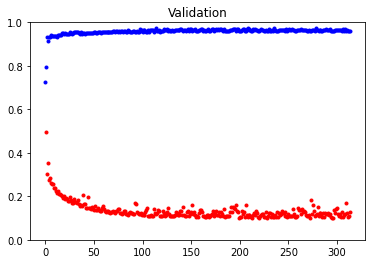

In [ ]:
y_loss, y_acc, y_vloss, y_vacc = [], [], [], []

history = model.fit(X, y, validation_split=0.2, 
                    epochs=2000, batch_size=100, verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
x_len = np.arange(len(y_acc))
plt.ylim(0.,1.)
plt.title("Traing")
plt.plot(x_len, y_loss, "o", c="r", markersize=3)
plt.plot(x_len, y_acc, "o", c="b", markersize=3)
plt.show()
plt.title("Validation")
plt.ylim(0.,1.)
plt.plot(x_len, y_vloss, "o", c="r", markersize=3)
plt.plot(x_len, y_vacc, "o", c="b", markersize=3)
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print("Acuracy: %.4f" %(model.evaluate(X, y)[1]))

41/41 [==============================] - 0s 2ms/step - loss: 0.0561 - accuracy: 0.9823
Acuracy: 0.9823


- 2000 epoch 전에 중간에 중단됨을 알 수 있다.

## 15. Linear Regression

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy
import pandas as pd
import tensorflow as tf

df = pd.read_csv("boston_housing.csv", delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
dataset = df.values
X, y = dataset[:,0:13] , dataset[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))    # no need of activation function

model.compile(loss='mean_squared_error',
              optimizer='adam')

model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
36/36 [==============================] - 0s 2ms/step - loss: 2037.9723
Epoch 2/200
36/36 [==============================] - 0s 2ms/step - loss: 257.1145
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 155.9259
Epoch 4/200
36/36 [==============================] - 0s 2ms/step - loss: 114.3591
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 86.0686
Epoch 6/200
36/36 [==============================] - 0s 2ms/step - loss: 74.1227
Epoch 7/200
36/36 [==============================] - 0s 2ms/step - loss: 66.5325
Epoch 8/200
36/36 [==============================] - 0s 2ms/step - loss: 62.4586
Epoch 9/200
36/36 [==============================] - 0s 2ms/step - loss: 60.1356
Epoch 10/200
36/36 [==============================] - 0s 2ms/step - loss: 59.0248
Epoch 11/200
36/36 [==============================] - 0s 2ms/step - loss: 56.2528
Epoch 12/200
36/36 [==============================] - 0s 2ms/step - loss: 52.0518
Epoch 13/200
36/36 [

In [ ]:
model.predict(X_test)[:5][:,0] == model.predict(X_test)[:5].flatten()

array([ True,  True,  True,  True,  True])

In [ ]:
# 예측 값과 실제 값의 비교
y_pred = model.predict(X_test).flatten()
for i in range(10):
    label = y_test[i]
    prediction = y_pred[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격: 28.100, 예상가격: 24.431
실제가격: 19.500, 예상가격: 23.639
실제가격: 20.000, 예상가격: 23.076
실제가격: 35.200, 예상가격: 33.727
실제가격: 27.900, 예상가격: 36.100
실제가격: 22.100, 예상가격: 30.902
실제가격: 8.800, 예상가격: 15.666
실제가격: 36.000, 예상가격: 35.070
실제가격: 17.100, 예상가격: 17.970
실제가격: 25.100, 예상가격: 32.036


# Exercise (연습)

In [ ]:
# tf.function: Compiles a function into a callable TensorFlow graph.
#               (must be faster), but not always...?
import timeit
@tf.function
def dense_layer1(x, w, b):
    return tf.add(tf.matmul(x, w), b)

def dense_layer2(x, w, b):
    return tf.add(tf.matmul(x, w), b)
  
%time dense_layer1(tf.ones([3, 2]), tf.ones([2, 2]), tf.ones([2]))
print()
%time dense_layer2(tf.ones([3, 2]), tf.ones([2, 2]), tf.ones([2]))
print()

CPU times: user 12.2 ms, sys: 0 ns, total: 12.2 ms
Wall time: 13.8 ms

CPU times: user 1.44 ms, sys: 0 ns, total: 1.44 ms
Wall time: 1.08 ms



In [ ]:
import timeit
conv_layer = tf.keras.layers.Conv2D(100, 3)

@tf.function
def conv_fn(image):
  return conv_layer(image)

image = tf.zeros([1, 200, 200, 100])
# 워밍 업
conv_layer(image); conv_fn(image)
print("즉시 실행 합성곱:", timeit.timeit(lambda: conv_layer(image), number=10))
print("tf.function 합성곱:", timeit.timeit(lambda: conv_fn(image), number=10))
print("합성곱 연산 속도에 큰 차이가 없습니다.")